In [300]:
import os
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime



In [301]:
#  === RULA TABLES ===
# RULA A, B, C tables as per the RULA assessment method
# https://www.researchgate.net/publication/228746180_Rapid_upper_limb_assessment_RULA
rula_a_table = [
    [1,2,2,2,2,3,3,3],
    [2,2,2,2,3,3,3,3],
    [2,3,3,3,3,3,4,4],
    [2,3,3,3,3,4,4,4],
    [3,3,3,3,3,4,4,4],
    [3,4,4,4,4,4,5,5],
    [3,3,4,4,4,4,5,5],
    [3,4,4,4,4,4,5,5],
    [4,4,4,4,4,5,5,5],
    [4,4,4,4,4,5,5,5],
    [4,4,4,4,4,5,5,5],
    [4,4,4,5,5,5,6,6],
    [5,5,5,5,5,6,6,7],
    [5,6,6,6,6,7,7,7],
    [6,6,6,7,7,7,7,8],
    [7,7,7,7,7,8,8,9],
    [8,8,8,8,8,9,9,9],
    [9,9,9,9,9,9,9,9]
]

rula_b_table = [
    [1,3,2,3,3,4,5,5,6,6,7,7],
    [2,3,2,3,4,5,5,5,6,7,7,7],
    [3,3,3,4,4,5,5,6,6,7,7,7],
    [5,5,5,6,6,7,7,7,7,7,8,8],
    [7,7,7,7,7,8,8,8,8,8,8,8],
    [8,8,8,8,8,8,8,9,9,9,9,9]
]

rula_c_table = [
    [1, 2, 3, 3, 4, 5, 5],
    [2, 2, 3, 4, 4, 5, 5],
    [3, 3, 3, 4, 4, 5, 6],
    [3, 3, 3, 4, 5, 6, 6],
    [4, 4, 4, 5, 6, 7, 7],
    [4, 4, 5, 6, 6, 7, 7],
    [5, 5, 6, 6, 7, 7, 7],
    [5, 5, 6, 7, 7, 7, 7]
]

In [302]:
# ======= Utilities =======
def load_image(filename):
    img = cv.imread(filename)
    if img is None:
        raise FileNotFoundError(f"Image file '{filename}' not found.")
    return img


In [303]:
# ==== LOAD DATA FROM XLSX ====
df = pd.read_excel("sample.xlsx")

# ==== LOAD RULA WORKSHEET IMAGES ====
rula_image = load_image("image/rula.jpg")

In [304]:
# ====== OUTPUT FOLDER ======
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# ===== RULA ANALYSIS FUNCTION ======

def get_posture_a(upper_arm, lower_arm, wrist_twist, wrist):
    coloum_num = (wrist - 1) * 2 + wrist_twist - 1
    row_num = (upper_arm - 1) * 3 + lower_arm - 1
    return rula_a_table[row_num][coloum_num], coloum_num, row_num

def get_posture_b(trunk, neck, legs):
    coloum_num =  (trunk - 1) * 2 + legs -1
    row_num = neck - 1
    return rula_b_table[row_num][coloum_num], coloum_num, row_num

def rula_analysis(upper_arm, lower_arm,wrist_twist,wrist,muscle_use_a,force_or_load_a,neck,trunk,leg,muscle_use_b,force_or_load_b):
    posture_a, col_a, row_a = get_posture_a(upper_arm, lower_arm, wrist_twist, wrist)
    posture_b, col_b, row_b = get_posture_b(trunk, neck, leg)

    wrist_and_arm = posture_a + muscle_use_a + force_or_load_a
    neck_trunk_and_leg = posture_b + muscle_use_b + force_or_load_b

    if wrist_and_arm > 8:
        wrist_and_arm = 8
    if neck_trunk_and_leg > 7:
        neck_trunk_and_leg = 7
    
    rula_score  = rula_c_table[wrist_and_arm - 1][neck_trunk_and_leg - 1]
    return rula_score,wrist_and_arm, neck_trunk_and_leg,[
        col_a, row_a, posture_a,
        col_b, row_b, posture_b,
    ],
 


In [306]:
# Starting points for each box
start_points = {
    "upper_arm": (1053, 736),
    "lower_arm": (1053, 1043),
    "wrist_twist": (771, 1568),
    "wrist": (1053, 1567),
    "posture_a": (1053, 1753),
    "muscle_use_a": (1053, 1926),
    "force_or_load_a": (1053, 2094),
    "wrist_and_arm": (1045, 2253),
    "neck": (2938, 370),
    "trunk": (2938, 1050),
    "leg": (2938, 1222),
    "posture_b": (2938, 1727),
    "muscle_use_b": (2938, 1902),
    "force_or_load_b": (2938, 2075),
    "neck_trunk_and_leg": (2938, 2253),
    "rula_score": (1599, 2278),
}

# Box size (from upper arm reference)
box_width = 1282 - 1053
box_height = 826 - 736

In [307]:
# ==== FONT SETTINGS ====
font = cv.FONT_HERSHEY_SIMPLEX
font_scale_score = 2
font_thickness_score = 4
font_small = 1
font_small_thickness = 2

# Special blue font
blue_items = {"wrist_and_arm", "rula_score", "neck_trunk_and_leg"}

In [308]:
# Starting points for each box
start_points = {
    "upper_arm": (1053, 736),
    "lower_arm": (1053, 1043),
    "wrist_twist": (771, 1568),
    "wrist": (1053, 1567),
    "posture_a": (1053, 1753),
    "muscle_use_a": (1053, 1926),
    "force_or_load_a": (1053, 2094),
    "wrist_and_arm": (1045, 2253),
    "neck": (2938, 370),
    "trunk": (2938, 1050),
    "leg": (2938, 1222),
    "posture_b": (2938, 1727),
    "muscle_use_b": (2938, 1902),
    "force_or_load_b": (2938, 2075),
    "neck_trunk_and_leg": (2938, 2253),
    "rula_score": (1599, 2278),
}

# Box size (from upper arm reference)
box_width = 1282 - 1053
box_height = 826 - 736

In [309]:
# === Define RULA image zones ===

# === Define RULA image zones for A Table ===
upper_arm_x1, upper_arm_y1 = 1349, 602
upper_arm_x2, upper_arm_y2 = 1486, 751

lower_arm_x1, lower_arm_y1 = 1488, 602 
lower_arm_x2, lower_arm_y2 = 1614, 651

wrist_twist_x1, wrist_twist_y1 = 1616, 540
wrist_twist_x2, wrist_twist_y2 = 1672, 602

wrist_x1, wrist_y1 = 1616, 352
wrist_x2, wrist_y2 = 1728, 414


# === Define RULA image zones for B Table ===
trunk_x1, trunk_y1 = 2263, 1342
trunk_x2, trunk_y2 = 2354, 1379

neck_x1, neck_y1 = 2144, 1457
neck_x2, neck_y2 = 2262, 1498

leg_x1, leg_y1 = 2262, 1421
leg_x2, leg_y2 = 2308, 1457

# === Define RULA image zones for C Table ===

wrist_arm_x1, wrist_arm_y1 = 1552, 1607
wrist_arm_x2, wrist_arm_y2 = 1608, 1657

neck_trunk_and_leg_x1, neck_trunk_and_leg_y1 = 1605, 1558
neck_trunk_and_leg_x2, neck_trunk_and_leg_y2 = 1662, 1606


In [310]:
def get_action_level_box(score: int):
    """Return action level box coordinates and color based on RULA score"""
    score = min(int(score), 7)
    
    boxes = {
        (1, 2): ((1330, 2079), (2105, 2128), (50, 205, 50)),  
        (3, 4): ((1329, 2123), (2105, 2173), (255, 193, 7)),   
        (5, 6): ((1329, 2163), (2105, 2213), (255, 87, 34)),
        7: ((1329, 2203), (2105, 2258), (244, 67, 54))         
    }
    
    for key, (tl, br, color) in boxes.items():
        if isinstance(key, tuple) and key[0] <= score <= key[1]:
            return tl, br, color
        elif key == score:
            return tl, br, color
    
    return None, None, None

def get_wrist_score_box(score: int):
    """Calculate wrist score box coordinates"""
    score = max(1, min(int(score), 4))
    base_top_left = (1616, 352)
    base_bottom_right = (1728, 414)
    box_width = base_bottom_right[0] - base_top_left[0]
    shift_x = (score - 1) * box_width
    
    top_left = (base_top_left[0] + shift_x, base_top_left[1])
    bottom_right = (base_bottom_right[0] + shift_x, base_bottom_right[1])
    
    return top_left, bottom_right

def draw_row_rectangle(img, base_top_left, base_bottom_right, row_num, color=(63, 81, 181)):
    """Draw rectangle for specified row"""
    box_height = base_bottom_right[1] - base_top_left[1]
    top_left = (base_top_left[0], base_top_left[1] + row_num * box_height)
    bottom_right = (base_bottom_right[0], base_top_left[1] + (row_num + 1) * box_height)
    
    cv.rectangle(img, top_left, bottom_right, color, 3)
    return top_left, bottom_right

def draw_column_rectangle(img, base_top_left, base_bottom_right, col_num, color=(156, 39, 176)):
    """Draw rectangle for specified column"""
    box_width = base_bottom_right[0] - base_top_left[0]
    top_left = (base_top_left[0] + col_num * box_width, base_top_left[1])
    bottom_right = (base_top_left[0] + (col_num + 1) * box_width, base_bottom_right[1])
    
    cv.rectangle(img, top_left, bottom_right, color, 3)
    return top_left, bottom_right

def draw_intersection_lines(img, horizontal_coords, vertical_coords, line_color=(76, 175, 80)):
    """Draw intersection lines between horizontal and vertical elements"""
    h_tl, h_br = horizontal_coords
    v_tl, v_br = vertical_coords
    
    cv.line(img, (h_tl[0], h_tl[1]), (v_br[0], h_tl[1]), line_color, 2)
    cv.line(img, (h_tl[0], h_br[1]), (v_br[0], h_br[1]), line_color, 2)
    cv.line(img, (v_tl[0], v_tl[1]), (v_tl[0], h_br[1]), line_color, 2)
    cv.line(img, (v_br[0], v_br[1]), (v_br[0], h_br[1]), line_color, 2)

def draw_intersection_rectangle(img, horizontal_coords, vertical_coords, rect_color=(255, 152, 0)):
    """Draw intersection rectangle"""
    h_tl, h_br = horizontal_coords
    v_tl, v_br = vertical_coords
    
    intersection_tl = (v_tl[0], h_tl[1])
    intersection_br = (v_br[0], h_br[1])
    
    cv.rectangle(img, intersection_tl, intersection_br, rect_color, 4)

def visualize_rula(rula_img, rula_score, wrist_and_arm, neck_trunk_and_leg, 
                  posture_details, upper_arm, wrist, neck, trunk):
    """Visualize RULA assessment with color-coded highlighting"""
    
    top_left, bottom_right, color = get_action_level_box(rula_score)
    if top_left and bottom_right:
        overlay = rula_img.copy()
        cv.rectangle(overlay, top_left, bottom_right, color, -1)
        cv.addWeighted(overlay, 0.3, rula_img, 0.7, 0, rula_img)

    row_color = (63, 81, 181)     
    col_color = (156, 39, 176)     
    line_color = (76, 175, 80)    
    intersection_color = (255, 152, 0) 

    draw_row_rectangle(rula_img, (upper_arm_x1, upper_arm_y1), (upper_arm_x2, upper_arm_y2), upper_arm - 1, row_color)
    # Calculate y1 and y2 adjustments based on posture_details[1] scaling from 0% to 100% for values 0 to 18
    y1_adjustment = int((posture_details[1] / 18) * posture_details[1])
    y2_adjustment = int((posture_details[1] / 18) * posture_details[1])

    # Update the y1 and y2 values by adding the calculated adjustments
    lower_arm_y1_adjusted = lower_arm_y1 + y1_adjustment
    lower_arm_y2_adjusted = lower_arm_y2 + y2_adjustment

    # Draw the row rectangle with the adjusted values
    la_coords = draw_row_rectangle(rula_img, (lower_arm_x1, lower_arm_y1_adjusted), (lower_arm_x2, lower_arm_y2_adjusted), posture_details[1], row_color)

    wt_coords = draw_column_rectangle(rula_img, (wrist_twist_x1, wrist_twist_y1), (wrist_twist_x2, wrist_twist_y2), posture_details[0], col_color)
    draw_column_rectangle(rula_img, (wrist_x1, wrist_y1), (wrist_x2, wrist_y2), wrist - 1, col_color)

    draw_intersection_lines(rula_img, la_coords, wt_coords, line_color)
    draw_intersection_rectangle(rula_img, la_coords, wt_coords, intersection_color)

    neck_coords = draw_row_rectangle(rula_img, (neck_x1, neck_y1), (neck_x2, neck_y2), neck - 1, row_color)
    trunk_coords = draw_column_rectangle(rula_img, (trunk_x1, trunk_y1), (trunk_x2, trunk_y2), trunk - 1, col_color)
    leg_coords = draw_column_rectangle(rula_img, (leg_x1, leg_y1), (leg_x2, leg_y2), posture_details[3], col_color)

    draw_intersection_lines(rula_img, neck_coords, trunk_coords, line_color)
    draw_intersection_rectangle(rula_img, neck_coords, leg_coords, intersection_color)

    wa_coords = draw_row_rectangle(rula_img, (wrist_arm_x1, wrist_arm_y1), (wrist_arm_x2, wrist_arm_y2), wrist_and_arm - 1, row_color)
    ntl_coords = draw_column_rectangle(rula_img, (neck_trunk_and_leg_x1, neck_trunk_and_leg_y1), (neck_trunk_and_leg_x2, neck_trunk_and_leg_y2), neck_trunk_and_leg - 1, col_color)
    
    draw_intersection_lines(rula_img, wa_coords, ntl_coords, line_color)
    draw_intersection_rectangle(rula_img, wa_coords, ntl_coords, intersection_color)

In [311]:
def get_date(date):
    if isinstance(date, datetime):
        return date.strftime("%Y-%m-%d")
    elif isinstance(date, str):
        try:
            return datetime.strptime(date, "%Y-%m-%d").strftime("%Y-%m-%d")
        except ValueError:
            return date
    else:
        return str(date)

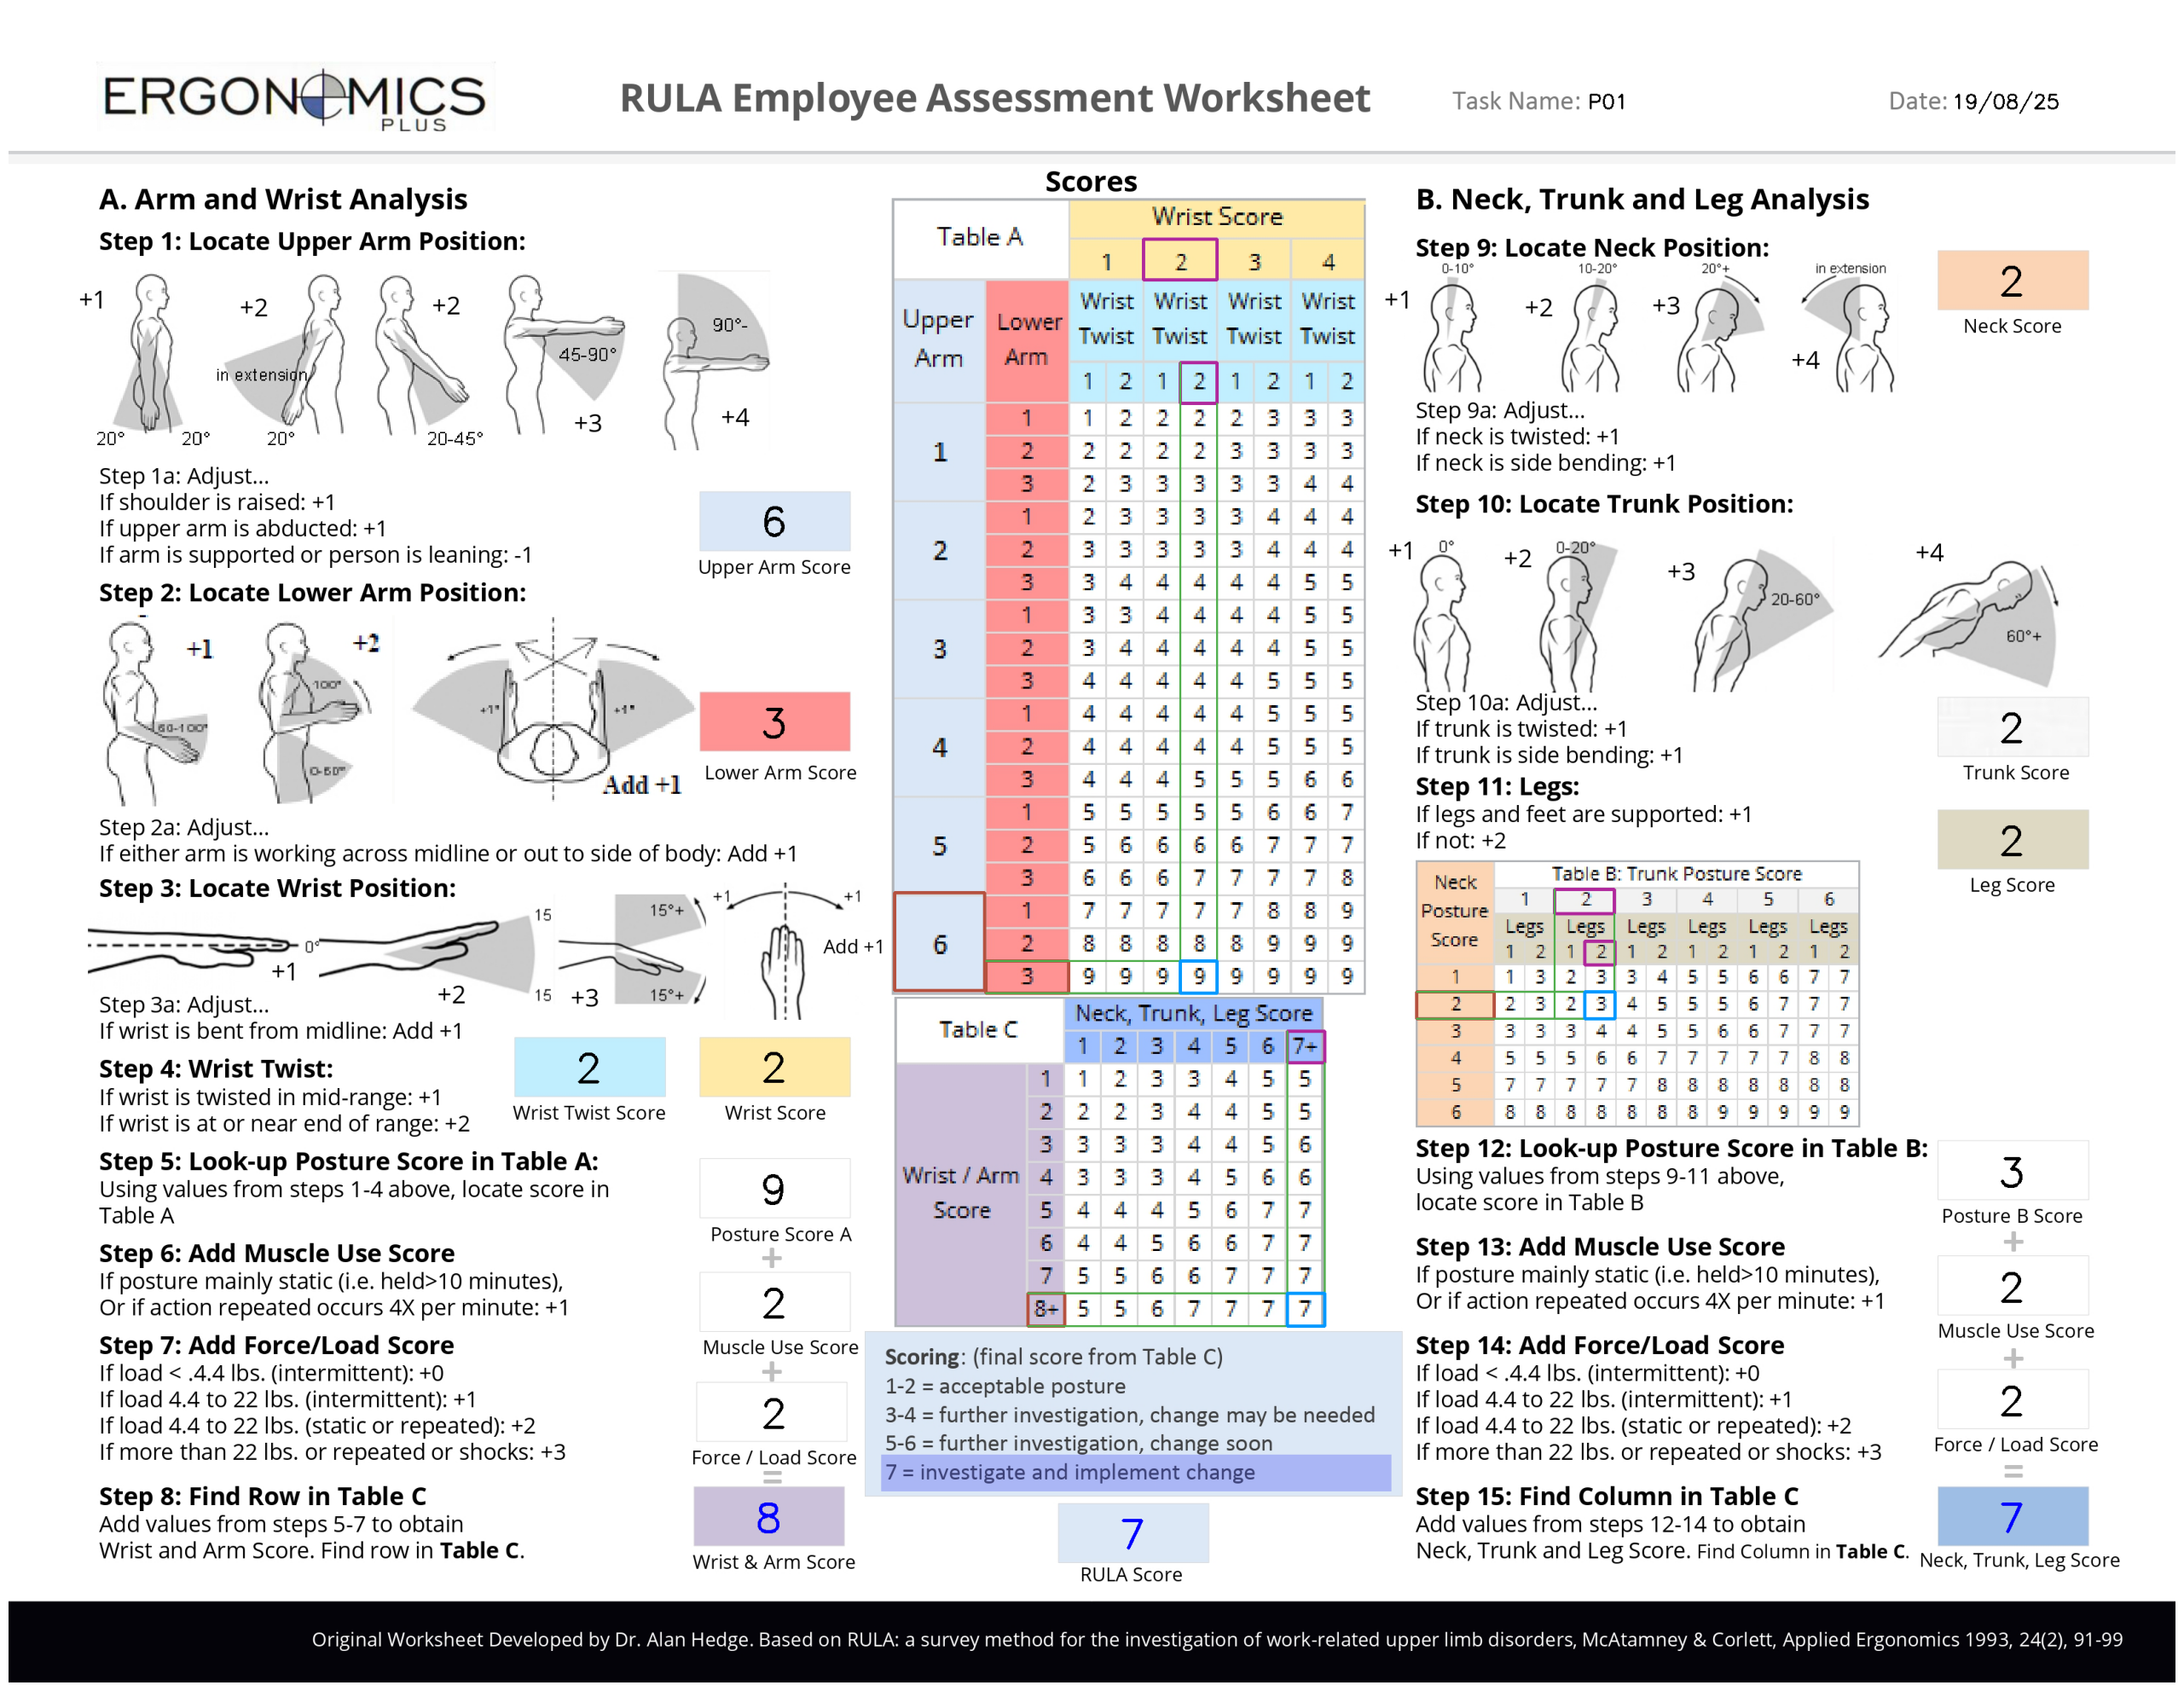

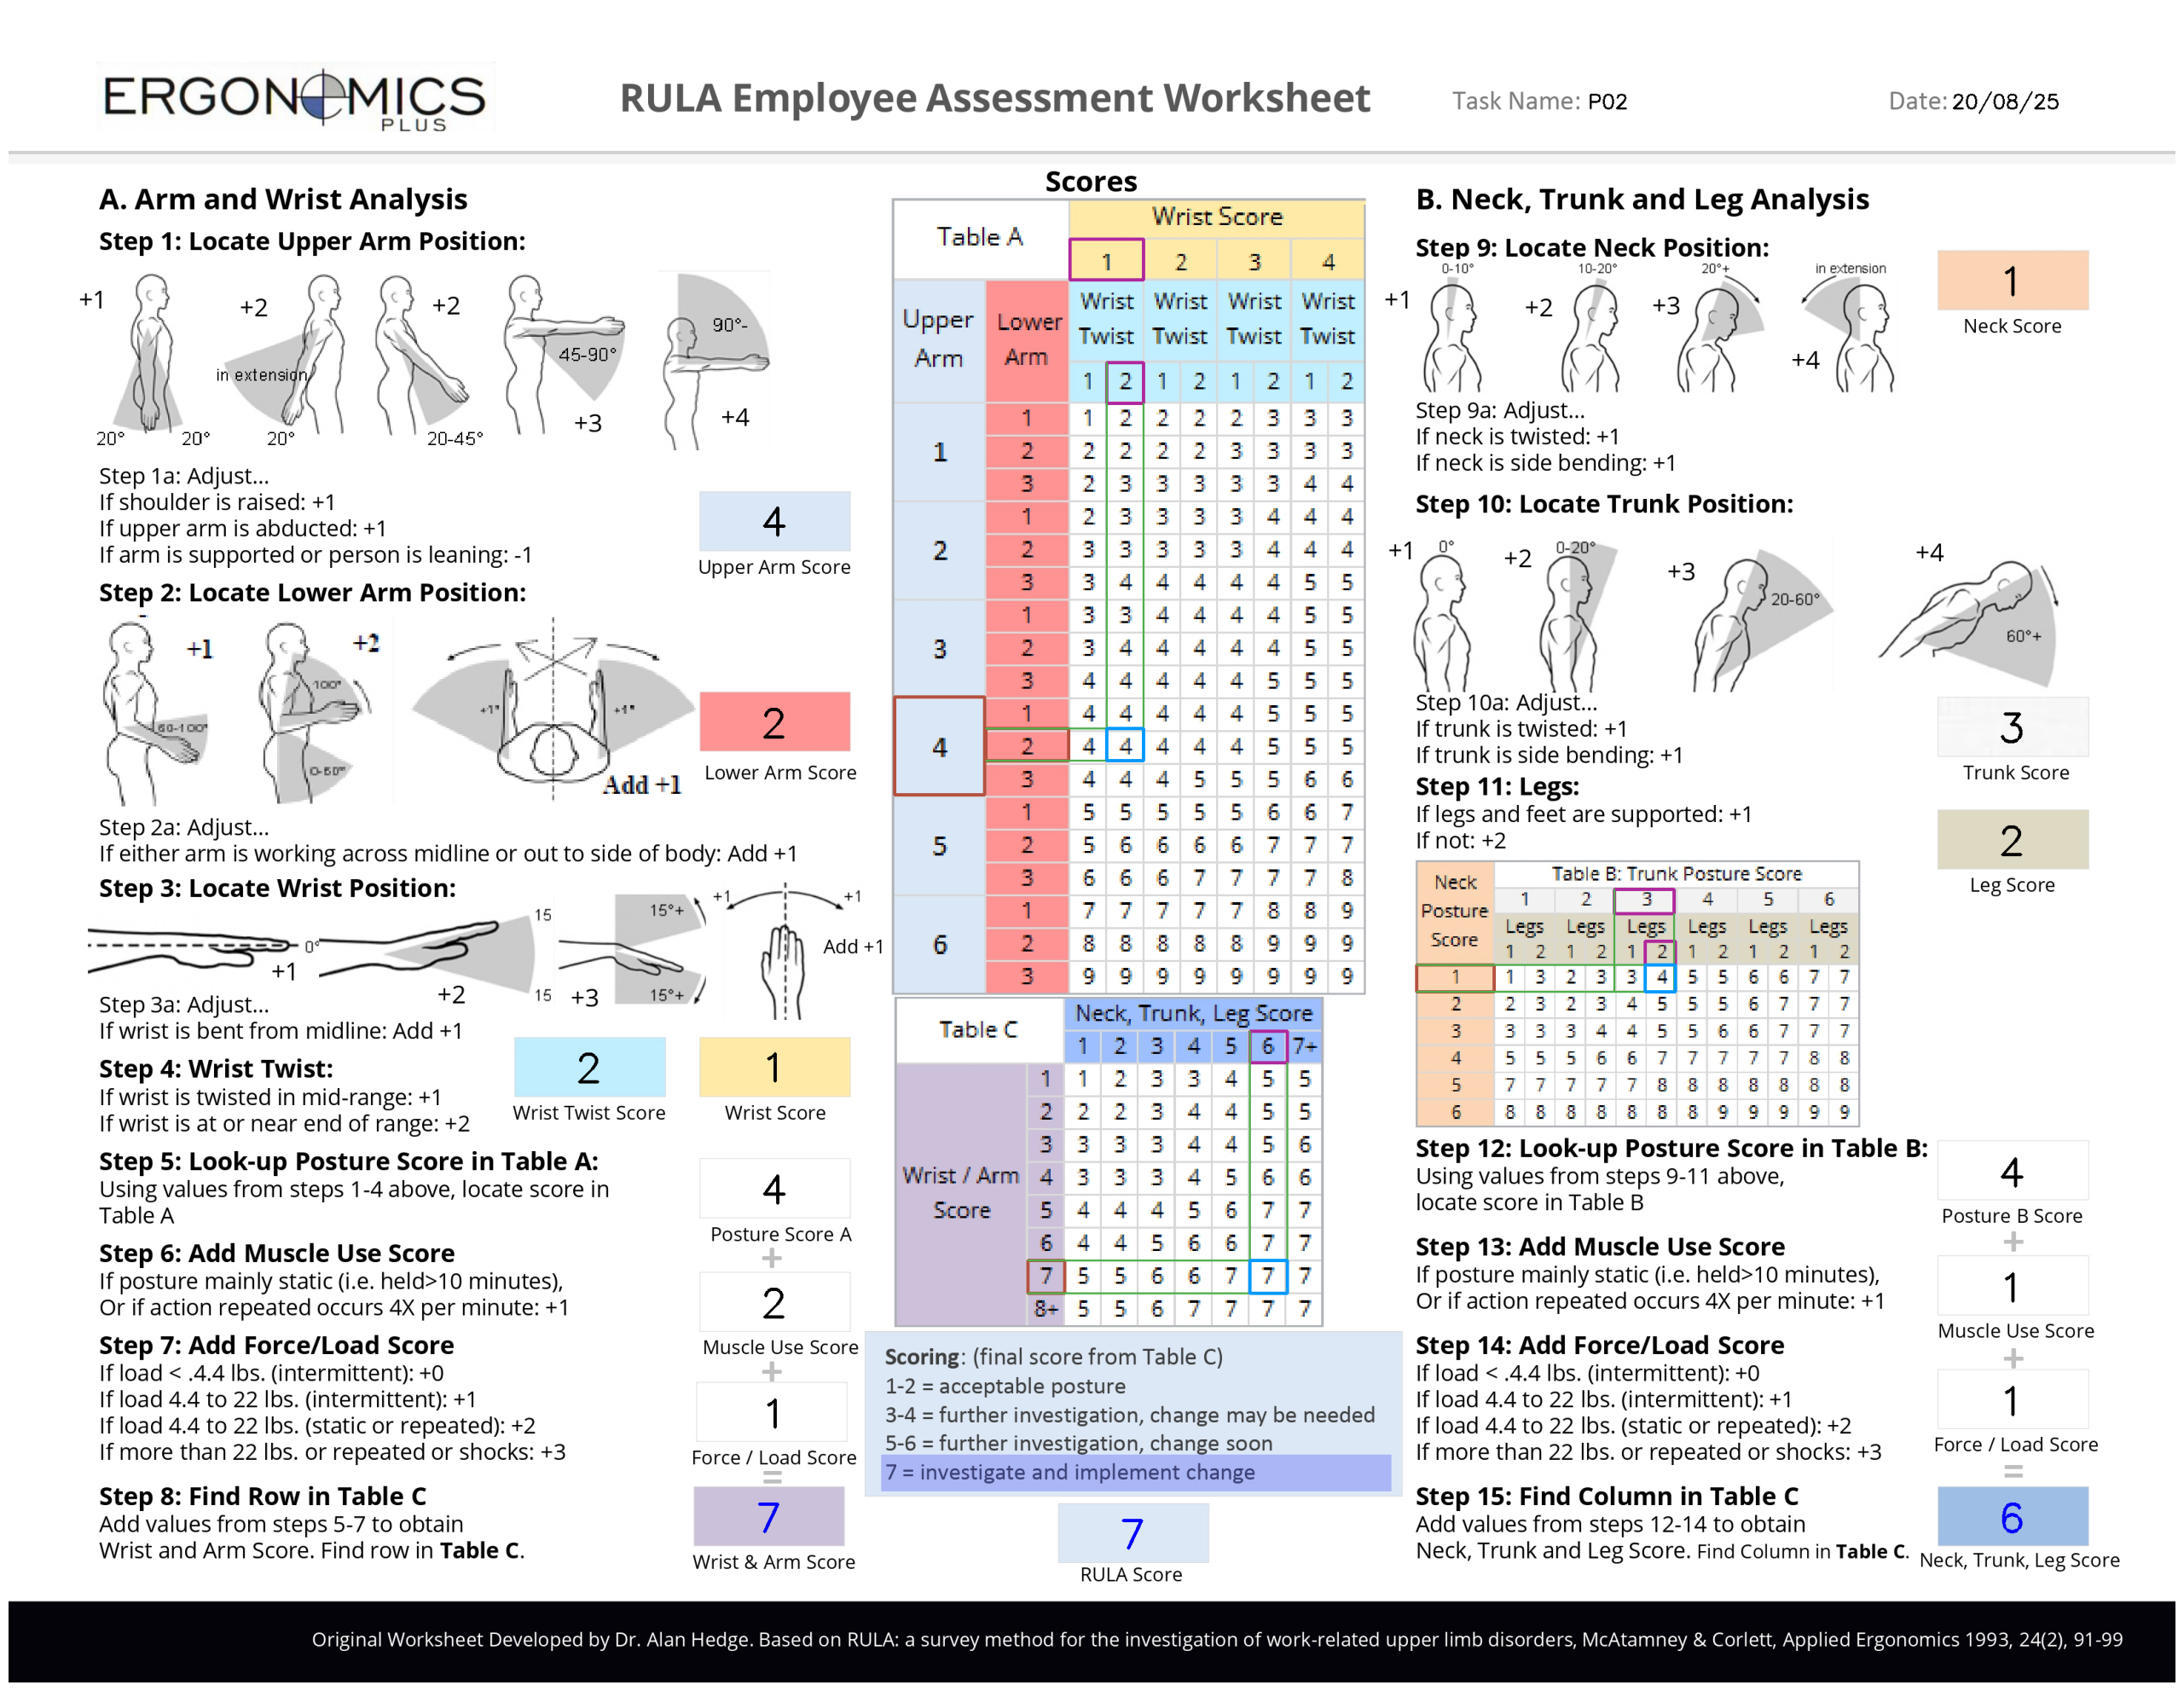

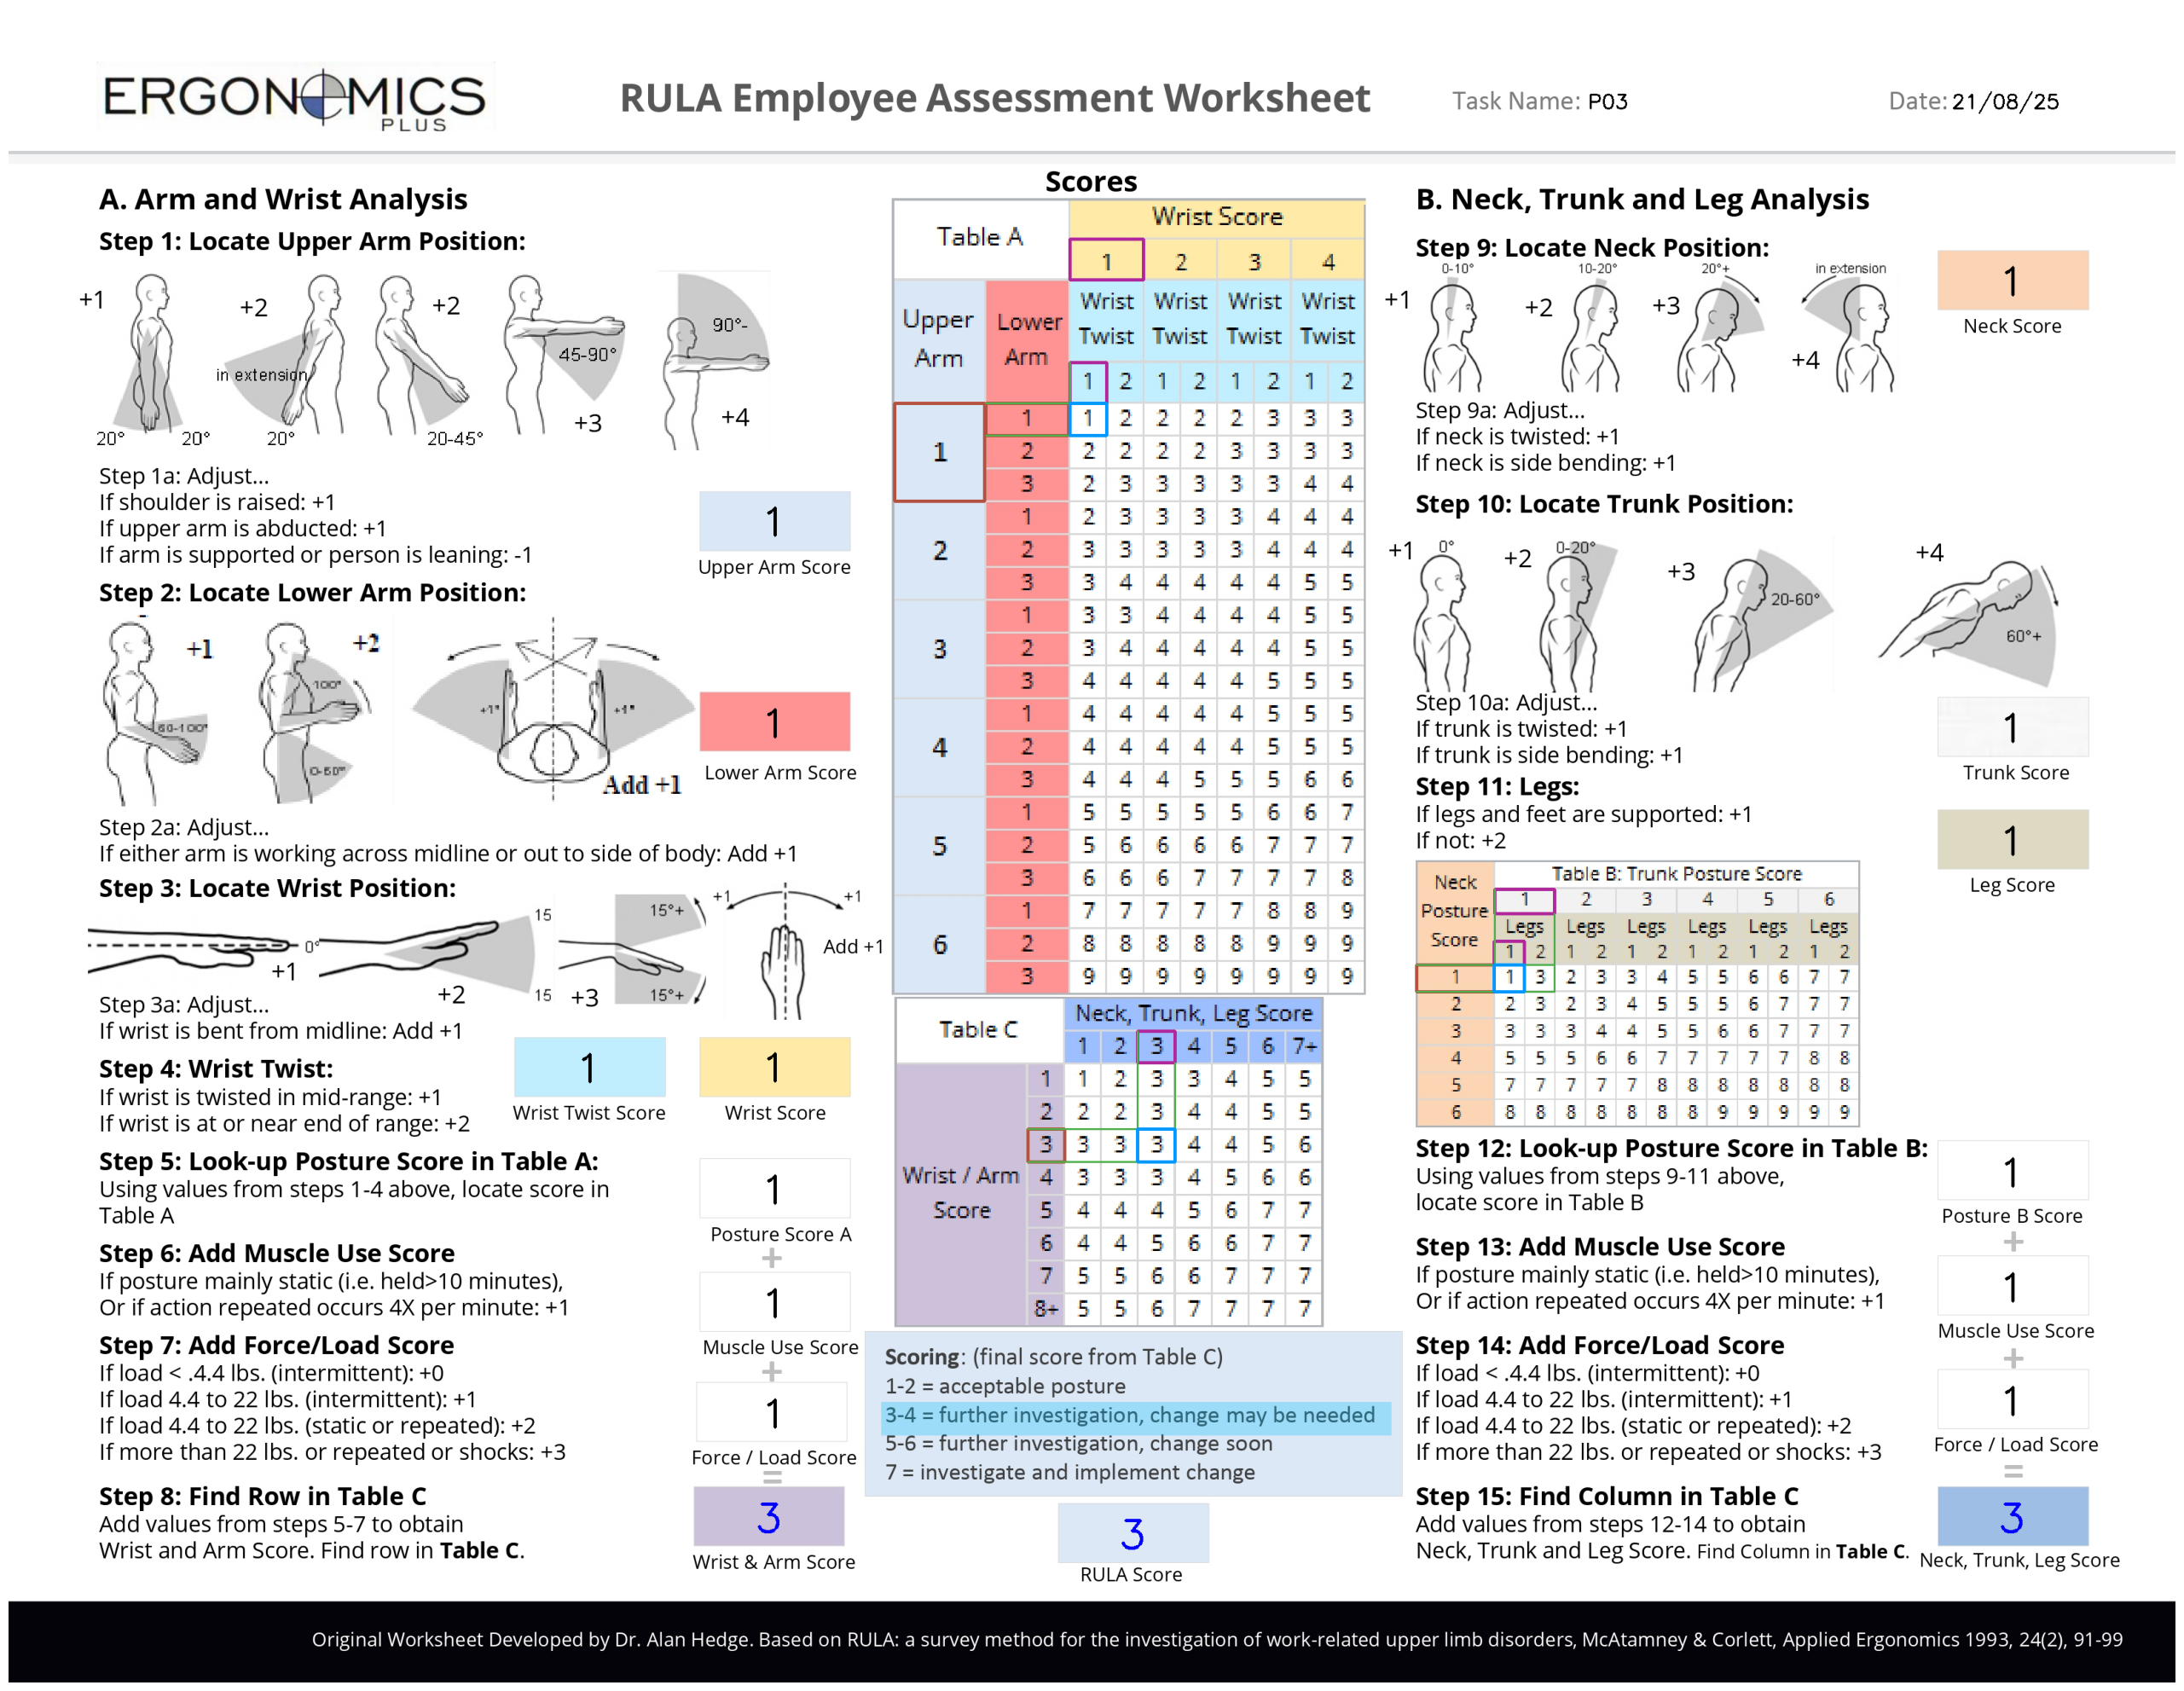

In [312]:
# ==== Process each row from Excel ====
for _, row in df.iterrows():
    rula_img = np.copy(rula_image)
    task_name = str(row["task_name"])
    date_str = get_date(row["date"])

    upper_arm = int(row["upper_arm"])
    wrist = int(row["wrist"])

    neck = int(row["neck"])
    trunk = int(row["trunk"])

    rula_score, wrist_and_arm, neck_trunk_and_leg, posture_details = rula_analysis(
        upper_arm,
        row["lower_arm"],
        row["wrist_twist"],
        wrist,
        row["muscle_use_a"],
        row["force_or_load_a"],
        neck,
        trunk,
        row["leg"],
        row["muscle_use_b"],
        row["force_or_load_b"]
    )


    # Draw all scores (existing logic)
    for name, (x, y) in start_points.items():
        score = row.get(name, "")
        text = str(int(score)) if pd.notna(score) and score != "" else "1"
        if name == "rula_score":
            text = str(int(rula_score))
        elif name == "neck_trunk_and_leg":
            text = str(int(neck_trunk_and_leg))
        elif name == "wrist_and_arm":
            text = str(int(wrist_and_arm))
        elif name == "posture_a":
            text = str(int(posture_details[2]))
        elif name == "posture_b":
            text = str(int(posture_details[5]))

        if text:
            text_size = cv.getTextSize(text, font, font_scale_score, font_thickness_score)[0]
            text_x = x + (box_width - text_size[0]) // 2
            text_y = y + (box_height + text_size[1]) // 2

            font_color = (255, 0, 0) if name in blue_items else (0, 0, 0)
            cv.putText(rula_img, text, (text_x, text_y), font,
                       font_scale_score, font_color, font_thickness_score)


    # Add task name + date
    cv.putText(rula_img, task_name, (2405, 153), font, font_small, (0, 0, 0), font_small_thickness)
    cv.putText(rula_img, date_str, (2959, 153), font, font_small, (0, 0, 0), font_small_thickness)

    visualize_rula(rula_img,rula_score, wrist_and_arm, neck_trunk_and_leg, posture_details, upper_arm, wrist, neck, trunk)

    # # === Show inline ===
    plt.figure(figsize=(rula_img.shape[1]/100, rula_img.shape[0]/100))
    plt.imshow(cv.cvtColor(rula_img, cv.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()

